In [4]:
import random
import networkx
import matplotlib.pyplot as plt

In [2]:
def ring_network(N):
    """
    Create a network with first and second neighbors connected.
    :param N: The number of nodes in the network (int)
    :return: The ring network (networkx Graph() object)
    """
    
    # Instantiate the graph
    graph = networkx.Graph()
    # Add the edges to the graph
    for i in range(0, N):
        # Add first neighbor edges
        graph.add_edge(i,(i+1)%N)
        # Add second neighbor edges
        graph.add_edge(i, (i+2)%N)
    # Return the graph for later use
    return graph

In [23]:

def add_shortcuts(g):
    nodes = list(g.nodes())
    random.shuffle(nodes)
    for i in range(0, len(nodes) - 1, 2):
        node_a = nodes[i]
        node_b = nodes[i + 1]
        g.add_edge(node_a, node_b)
    return g


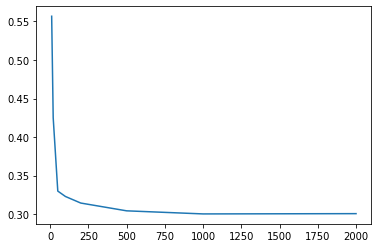

In [24]:
N_list = [10, 20, 50, 100, 200, 500, 1000, 2000]
values = [networkx.average_clustering(add_shortcuts(ring_network(N))) for N in N_list]
plt.plot(N_list, values)

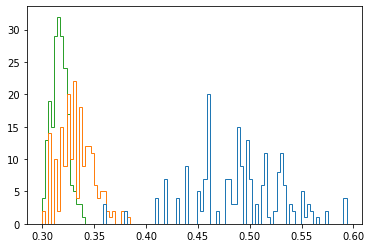

In [25]:
values_50 = [networkx.average_clustering(add_shortcuts(ring_network(50))) for i in range(200)]
values_10 = [networkx.average_clustering(add_shortcuts(ring_network(10))) for i in range(200)]
values_100 = [networkx.average_clustering(add_shortcuts(ring_network(100))) for i in range(200)]
_ = plt.hist([values_10, values_50, values_100 ], histtype='step', bins=100)
